**Introduction**

INX Future Inc., a reputed analytics and automation solutions provider, has observed a recent decline in its employee performance indicators, resulting in increased client escalations and reduced satisfaction scores. While the company's HR policies are widely regarded as employee-friendly, top management is concerned about the underlying causes driving this performance dip.

To address this challenge, INX has launched a comprehensive data science initiative aimed at uncovering patterns, trends, and actionable insights from historical employee data. As part of this project, the goal is to analyze employee attributes, identify the most influential factors affecting performance, and develop a predictive model capable of forecasting employee performance ratings. This will support management in making informed, fair, and objective decisions regarding workforce improvement strategies.

This notebook presents a workflow including data ingestion, exploratory data analysis (EDA), feature engineering, model development, and insight generation.

**Project Objectives**

1. Understand the Dataset:
Examine the employee data structure, variable types, and initial patterns.

2. Conduct Comprehensive EDA:
Univariate Analysis to examine individual feature distributions.
Bivariate Analysis to explore feature relationships with the target variable and between variables.
Multivariate Analysis to uncover deeper interactions and combined effects.

3. Identify Key Performance Drivers:
Determine the top factors influencing employee performance using statistical methods and feature importance scores.

4. Build a Predictive Model:
Train and evaluate machine learning models capable of predicting employee performance ratings to support HR decision-making and potential use in recruitment or performance assessments.

5. Generate Actionable Insights:
Provide data-driven recommendations to management to improve employee performance while maintaining high morale and organizational reputation.

**Dataset Overview**

The dataset contains detailed information on employee demographics, job characteristics, compensation, experience history, and satisfaction metrics. These variables collectively influence employee performance outcomes and form the foundation for our analysis.

Each record represents a unique employee and includes fields such as:

1. Demographics: Age, Gender, Marital Status

2. Job-related Attributes: Department, Job Role, Job Level

3. Work Behavior: Overtime, Travel Frequency

4. Experience Metrics: Total Experience, Role Experience, Years With Current Manager

5. Satisfaction Indicators: Job Satisfaction, Environment Satisfaction, Relationship Satisfaction

6. Target Variable: PerformanceRating (1 to 4 scale)

Understanding the distribution and relationships among these variables is essential for identifying performance drivers.

**Approach and Methodology**

This notebook follows a structured data science methodology:

- Data Loading and Initial Checks

- Univariate, Bivariate, and Multivariate Exploratory Data Analysis

- Feature Engineering

- Model Training using Pipelines

- Model Evaluation

- Feature Importance Analysis

- Recommendations for INX Management

The combination of analytical exploration and machine learning ensures both explainability and predictive value, aligning with INX’s objectives to make informed, data-driven decisions.

In [1]:
#Loading the libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Loading the Dataset
Data_path = "C:\\Users\\HP\\Downloads\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
df = pd.read_excel(Data_path)

print('data loaded successfully')



data loaded successfully


#  Data Overview

This section provides:
- Basic structural information (rows, columns, shape)
- Column names and data types
- Summary statistics for numerical features
- Initial frequency counts for categorical features

A strong understanding of the raw dataset ensures cleaner preprocessing and more meaningful exploratory analysis.


In [3]:
# Data Overview
print("=== BASIC DATA OVERVIEW ===")
print("Shape of the dataset:", df.shape)
print(df.info())

# show column names
for col in df.columns:
    print(col)

#show data types
print ("Data Types:\n", df.dtypes)
print (df.dtypes)

# Display first few rows
print(df.head())

# Display last few rows
print(df.tail())

# Summary statistics for numerical columns
print(df.describe().T)

# Summary for categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n=== Value Counts For {col} ===")
    print(df[col].value_counts().head)


# Unique values in each column
for col in df.columns:
    print(f"\n=== Unique Values In {col} ===")
    print(df[col].nunique())



=== BASIC DATA OVERVIEW ===
Shape of the dataset: (1200, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolveme

## Data Cleaning
The purpose of this section is to transform the dataset into a reliable, structured format by:

- Standardizing categorical formatting  
- Fixing column name inconsistencies  
- Handling missing values if any
- Correcting Data Types

This step ensures the data is trustworthy and ready for deeper insights during Exploratory Data Analysis (EDA).


In [4]:

# Cleaning the Dataset
print("\n=== DATA CLEANING ===")

#Standardizing column names
df.columns = df.columns.str.strip()

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip() 
    df[col] = df[col].str.replace(' ', '_')
    df[col] = df[col].str.title()

# Check for missing values
print('\n=== Missing values Per Column')
print(df.isnull().sum())

# Correcting Data types
numeric_cols =df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(cat_cols))

# Final shape of the cleaned dataset
print(df.shape)



=== DATA CLEANING ===

=== Missing values Per Column
EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating           

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps uncover patterns, irregularities, and relationships within the dataset.  
This step provides the foundation for feature engineering, model selection, and ultimately business insights.




### Univariate Exploratory Data Analysis  
- This analysis explores one variable at a time, including:  
  


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\3323967900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PerformanceRating', palette='viridis')


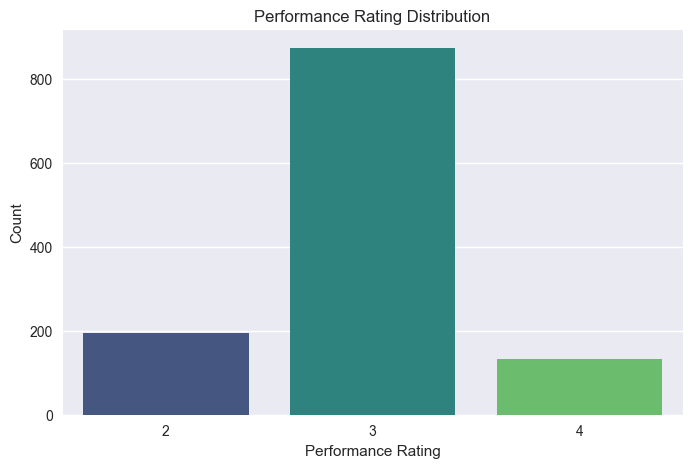

In [5]:
# Performance Rating Distribution as sublots
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PerformanceRating', palette='viridis')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()



###  Performance Rating Distribution

This plot shows the distribution of employee performance ratings across the organization.  
The majority of employees fall under Rating 3, indicating average or above-average performance.  

Key observations:
- Rating 3 dominates the dataset with over 870 employees.
- Ratings 2 and 4 represent smaller groups, with ~200 and ~130 employees respectively.
- This imbalance suggests the need for resampling (that is SMOTENC) during model training to avoid bias toward the majority class.

This distribution sets the foundation for understanding workforce performance and guides our modeling strategy.


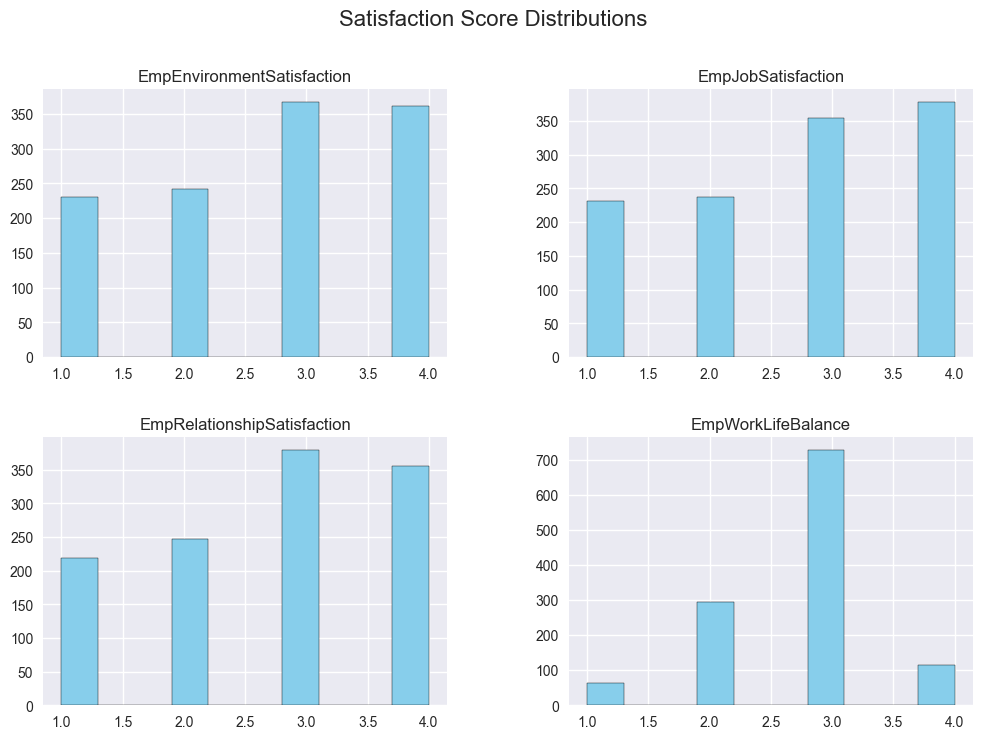

In [6]:
# Satisfaction Score Distribution
satisfaction_cols = ['EmpEnvironmentSatisfaction', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance']

df[satisfaction_cols].hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Satisfaction Score Distributions', fontsize=16)
plt.show()



## Satisfaction Score Distributions

These plots display the distribution of various employee satisfaction metrics:

- Environment Satisfaction
- Job Satisfaction
- Relationship Satisfaction
- Work–Life Balance

Key insights:
- Most employees rated their satisfaction between **3 and 4**, suggesting generally positive sentiment.
- Work–Life Balance has a clear peak at **level 3**, showing many employees are moderately satisfied.
- Lower satisfaction levels (1 and 2) still exist across metrics, which may influence performance scores and attrition risk.

These satisfaction measures are critical HR indicators and often correlate strongly with performance, engagement, and turnover.


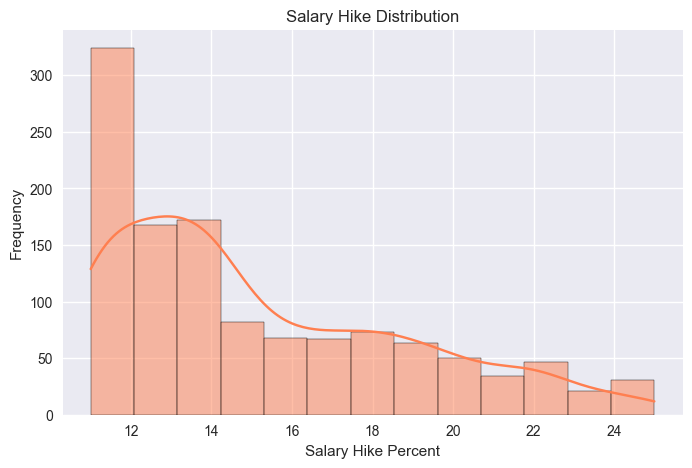

In [7]:
#Salary Hike
plt.figure(figsize=(8, 5))
sns.histplot(df['EmpLastSalaryHikePercent'], kde=True, color='coral')
plt.title('Salary Hike Distribution')
plt.xlabel('Salary Hike Percent')
plt.ylabel('Frequency')
plt.show()



## Salary Hike Percent Distribution

The salary hike distribution shows how annual salary increases are spread across employees.

Key observations:
- Most salary hikes fall between **11% and 15%**.
- Very few employees receive salary hikes above **20%**, indicating these are exceptional.
- The right-skewed pattern suggests that higher hikes are rare and may be aligned with high performers or special cases.

Analyzing this metric helps determine whether compensation growth correlates with performance or career progression.


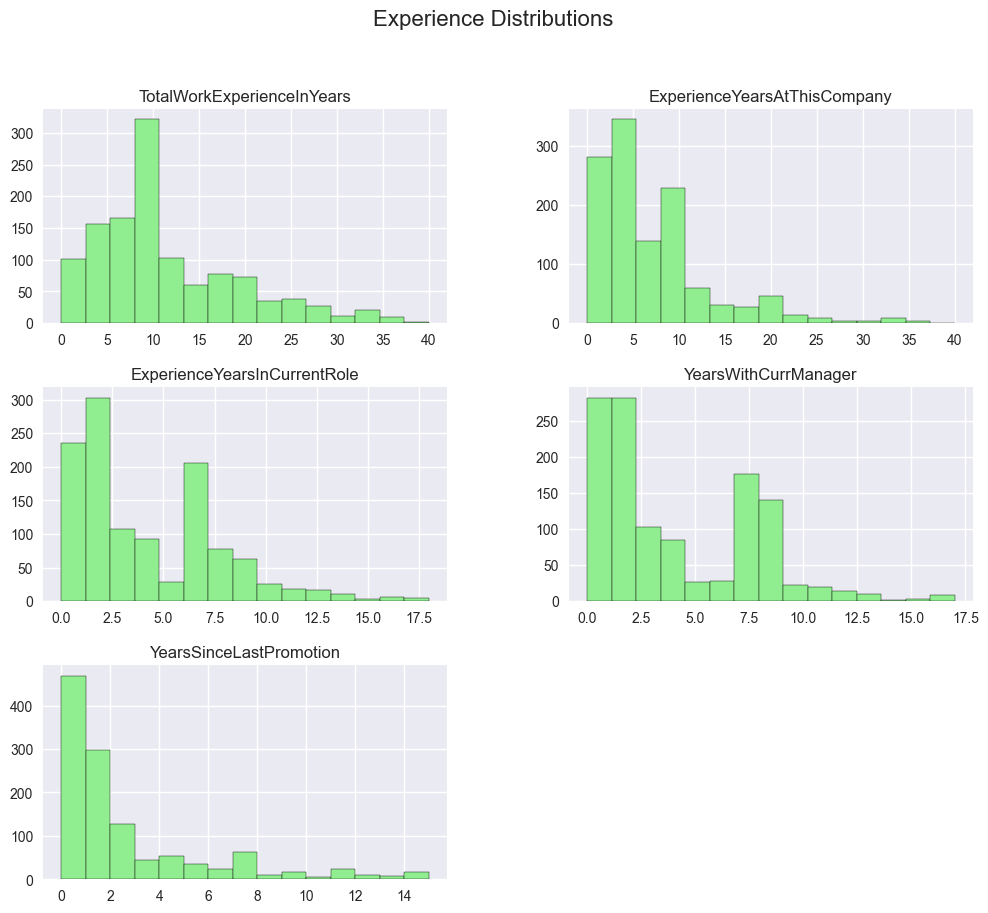

In [8]:
#  Experience
experience_cols = ['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager','YearsSinceLastPromotion']
df[experience_cols].hist(bins=15, figsize=(12, 10), color='lightgreen', edgecolor='black')
plt.suptitle('Experience Distributions', fontsize=16)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()



## Employee Experience Distributions

These histograms illustrate various experience-related metrics:

- Total work experience
- Experience at the company
- Experience in current role
- Years with current manager
- Years since last promotion

Key findings:
- All experience metrics are **right-skewed**, indicating many employees are early in their careers.
- Internal mobility appears limited as many employees have **low values** for experience in role and years since last promotion.
- Employees tend to stay with the same manager for fewer than **4 years**, suggesting rotational placements or restructuring.

Understanding experience dynamics supports performance analysis and promotion readiness evaluation.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\1185322642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EmpDepartment', palette='muted')


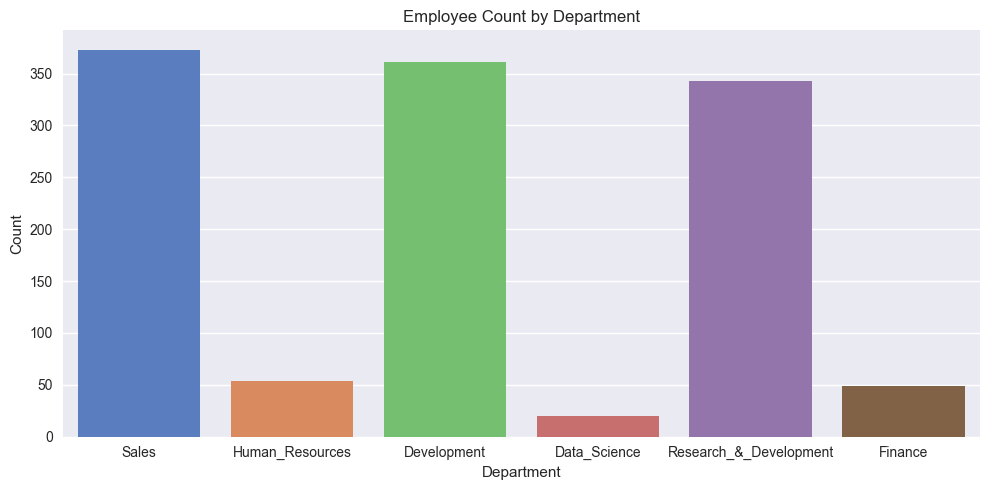

In [9]:
# Department Counts
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='EmpDepartment', palette='muted')
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



## Employee Count by Department

This plot shows how employees are distributed across departments.

Key insights:
- The **Sales**, **Development**, and **Research & Development** departments have the highest employee counts.
- Smaller departments include **HR**, **Finance**, and **Data Science**, each with fewer than 60 employees.
- Departments with larger populations may have higher performance variability and different workforce management needs.

This breakdown helps identify whether department size influences performance outcomes.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2017215838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EmpJobRole', palette='bright')


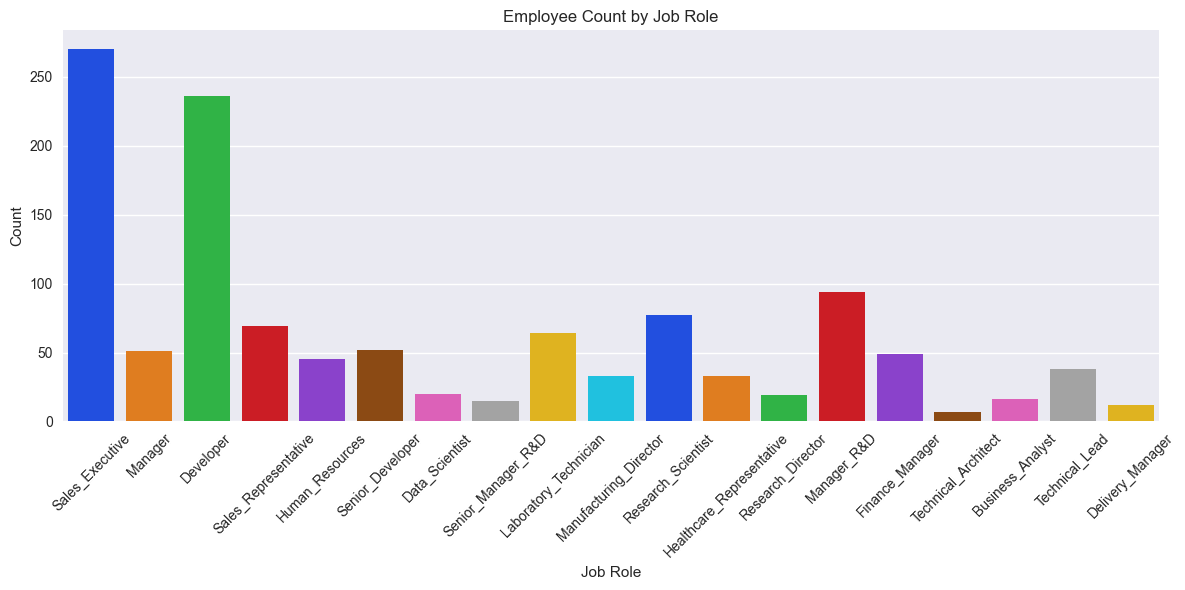

In [10]:
# Job Role Counts
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='EmpJobRole', palette='bright')
plt.title('Employee Count by Job Role')
plt.xticks(rotation=45)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Employee Count by Job Role

This visualization shows the distribution of employees across different job roles.

Key observations:
- **Sales Executive** and **Developer** roles are dominant, representing the majority of the workforce.
- Roles like **Research Scientist**, **Laboratory Technician**, and **Manager_R &** also appear in significant numbers.
- Specialist roles such as **Data Scientist**, **Senior_Manager_R&D**, and **Technical_Architect** have far fewer employees.

This diversity in job roles is important for analyzing performance patterns and departmental contributions.


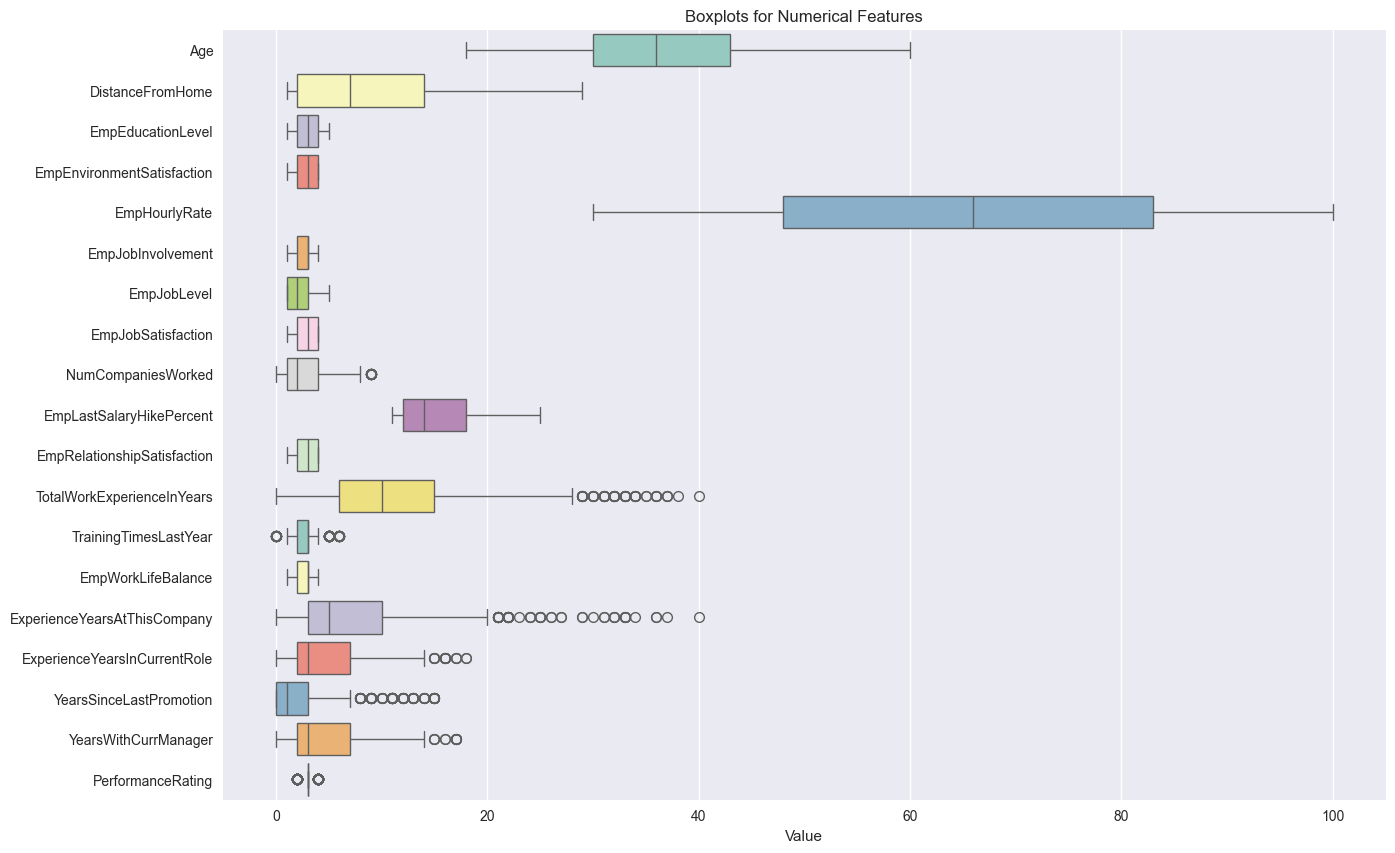

In [11]:
# Boxplot for Outlier Identifier
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set3')
plt.title('Boxplots for Numerical Features')
plt.xlabel('Value')     
plt.show()

## Outlier Analysis (Numeric Features)

This plot highlights potential outliers in key numerical features such as:

- Salary hike percent
- Years of experience
- Years since last promotion

Outliers can signal:
- Exceptional performers
- Fast promotions or rapid salary growth
- Data entry errors
- Unusual employment patterns

Identifying and understanding these outliers is important before modeling, as they may impact model sensitivity or skew predictions if left unaddressed.


## Bivariate Analysis

We explore how key Human Resource variables relate to employee performance.

### Variables analyzed:
- Satisfaction metrics → Performance
- Experience growth → Performance
- Salary hike → Performance
- Department / Job Role → Performance
- Environment Satisfaction → Attrition
- Work-life balance → Performance

These relationships help Human Resource understand what truly drives performance outcomes.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2920797236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='EmpEnvironmentSatisfaction', palette='coolwarm')


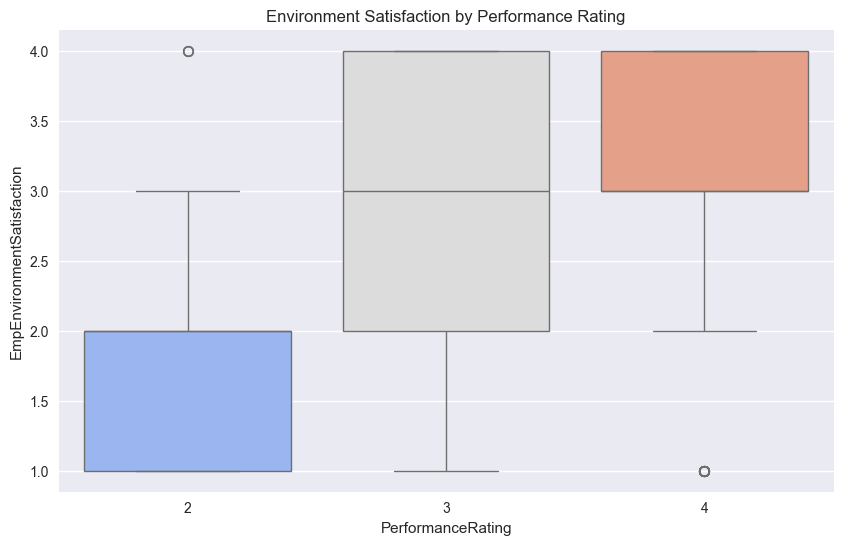

C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2920797236.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='EmpJobSatisfaction', palette='coolwarm')


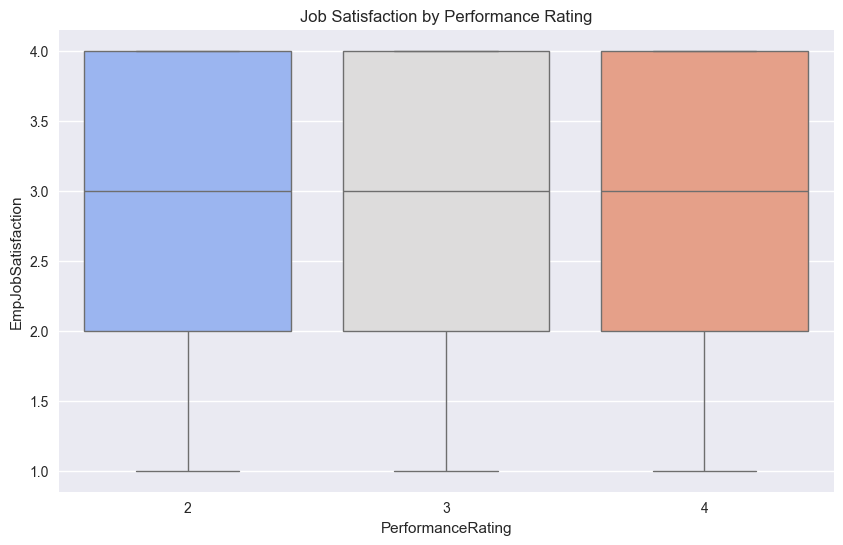

In [12]:
# Employee Satisfaction Impact on Performance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PerformanceRating', y='EmpEnvironmentSatisfaction', palette='coolwarm')
plt.title('Environment Satisfaction by Performance Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PerformanceRating', y='EmpJobSatisfaction', palette='coolwarm')
plt.title('Job Satisfaction by Performance Rating')
plt.show()

## Environment Satisfaction vs Performance Rating

This boxplot compares environment satisfaction across performance ratings.

Findings:
- Employees with **higher performance ratings (4)** tend to report **higher environment satisfaction**.
- Low performers (rating 2) show lower satisfaction levels.
  
This suggests a **positive relationship between workplace environment and employee performance**.

## Job Satisfaction vs Performance Rating

This boxplot shows how job satisfaction varies with performance.

Insights:
- Distribution is very similar across all performance ratings.
- This suggests **job satisfaction alone may not strongly differentiate performance levels**.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2391537167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='TotalWorkExperienceInYears', palette='pastel')


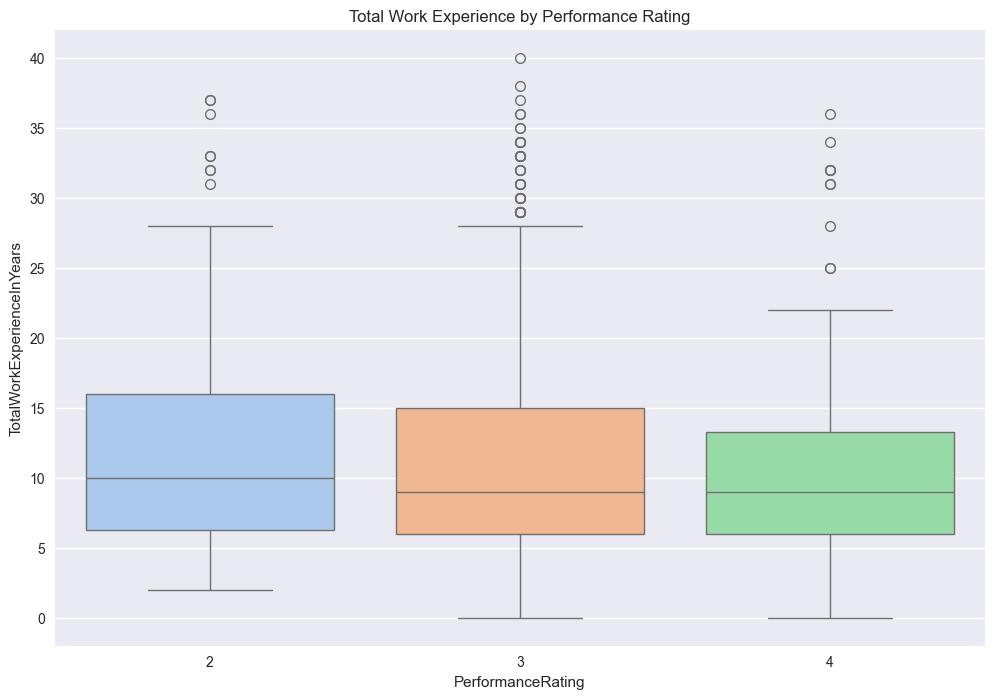

C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2391537167.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='ExperienceYearsInCurrentRole', palette='pastel')


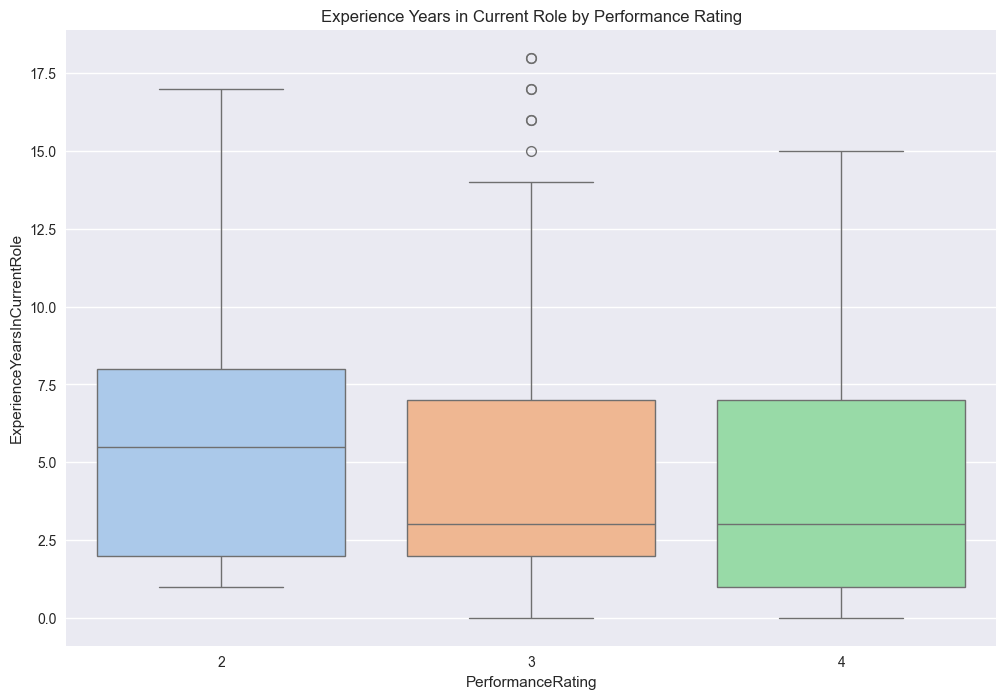

In [13]:
# Experience growth patterns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PerformanceRating', y='TotalWorkExperienceInYears', palette='pastel')
plt.title('Total Work Experience by Performance Rating')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PerformanceRating', y='ExperienceYearsInCurrentRole', palette='pastel')
plt.title('Experience Years in Current Role by Performance Rating')
plt.show()

## Total Work Experience vs Performance Rating

This boxplot studies how experience impacts performance.

Observations:
- Rating 2 employees have slightly higher variation in experience.
- Ratings 3 and 4 employees show similar experience levels.

Experience alone does not strongly predict performance, but contributes with other features.

## Experience in Current Role vs Performance Rating

Key Points:
- Most employees, regardless of performance, have between **1–5 years** in the current role.
- Higher performers do not necessarily have more role experience.

This suggests promotions/new roles may reset experience levels even for high performers.



C:\Users\HP\AppData\Local\Temp\ipykernel_4888\365533782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='EmpLastSalaryHikePercent', palette='Set2')


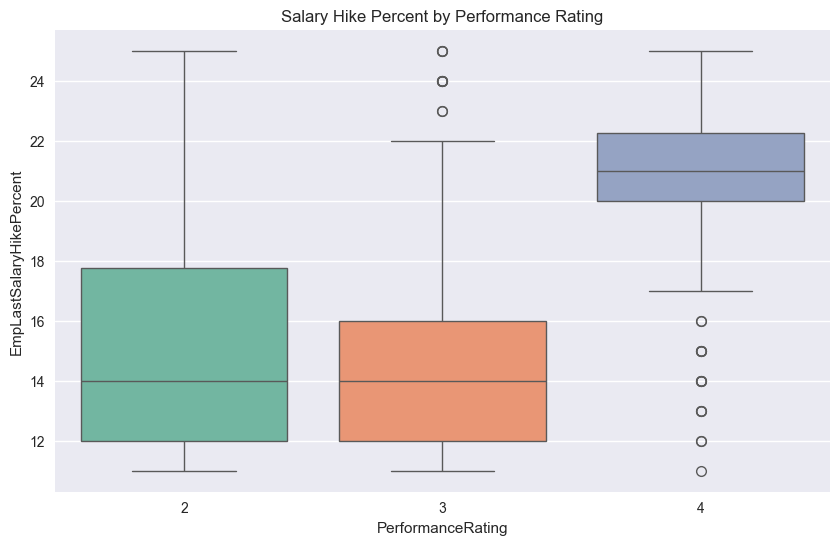

In [14]:
# Salary Hike vs Performance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PerformanceRating', y='EmpLastSalaryHikePercent', palette='Set2')
plt.title('Salary Hike Percent by Performance Rating')
plt.show()

## Salary Hike Percent vs Performance Rating

Clear Trend:
- Employees with **Rating 4** consistently receive the **highest salary hikes**.
- Rating 2 employees receive the lowest hikes.

This confirms that **salary hikes are closely aligned with performance evaluations**.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\4287191181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='EmpDepartment', y='PerformanceRating', palette='Spectral')


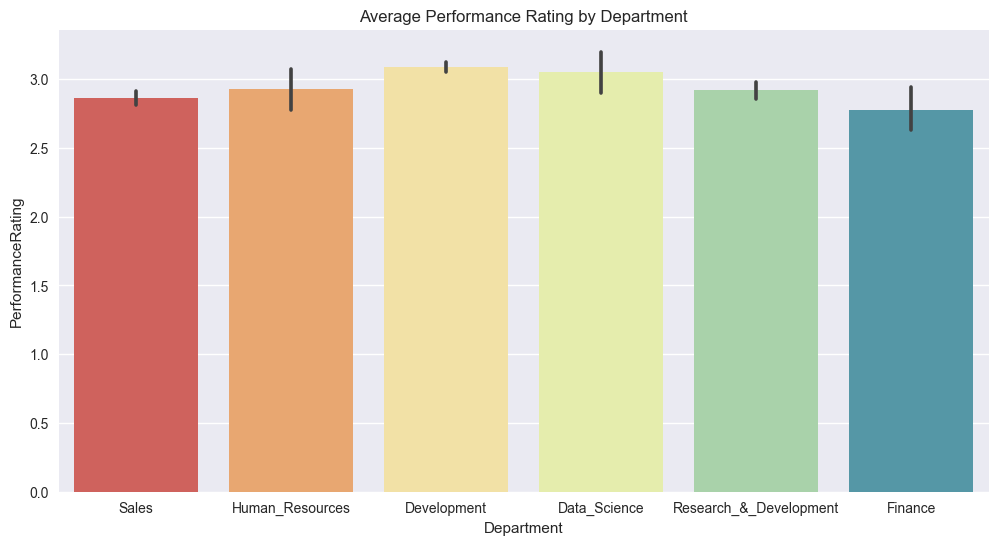

In [15]:
# Department Performance Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='EmpDepartment', y='PerformanceRating', palette='Spectral')
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')    
plt.show()

## Performance Rating by Department

Departments such as **Development** and **Data Science** have slightly higher average performance ratings.  
Sales and Finance show lower averages.

This insight helps identify:
- High-performing departments
- Areas needing training or process improvement


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\3587547721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='EmpJobRole', y='PerformanceRating', palette='Spectral')


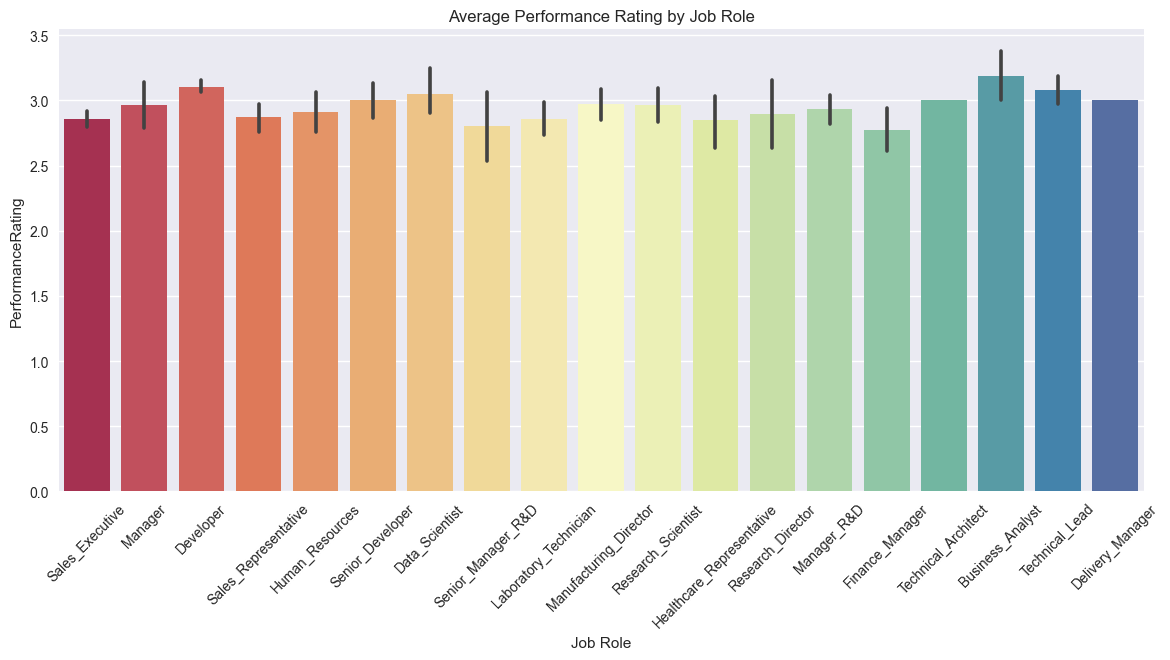

In [16]:
# Job role performance analysis
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='EmpJobRole', y='PerformanceRating', palette='Spectral')
plt.title('Average Performance Rating by Job Role')
plt.xticks(rotation=45)
plt.xlabel('Job Role')
plt.show()

## Performance Rating by Job Role

Observations:
- **Technical Lead, Business Analyst, Developer** roles display stronger performance.
- Operational roles such as **Sales Executive** show lower ratings.
  
Job role plays a critical part in driving employee performance dynamics.


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\1301502906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PerformanceRating', y='EmpWorkLifeBalance', palette='Set1')


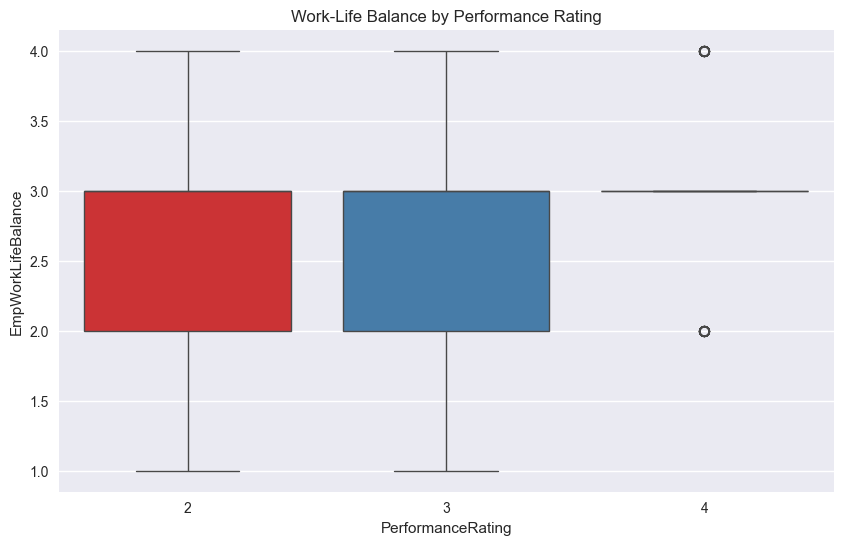

In [17]:
# Worklife Balance Trends
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PerformanceRating', y='EmpWorkLifeBalance', palette='Set1')
plt.title('Work-Life Balance by Performance Rating')
plt.show()

## Work-Life Balance vs Performance Rating

Analysis shows:
- Work-life balance ratings are mostly between **2 and 3** across all performance levels.
- Rating 4 employees slightly trend towards better balance.

Work-life balance may influence performance but not as strongly as satisfaction or salary hikes.


## Multivariate Analysis


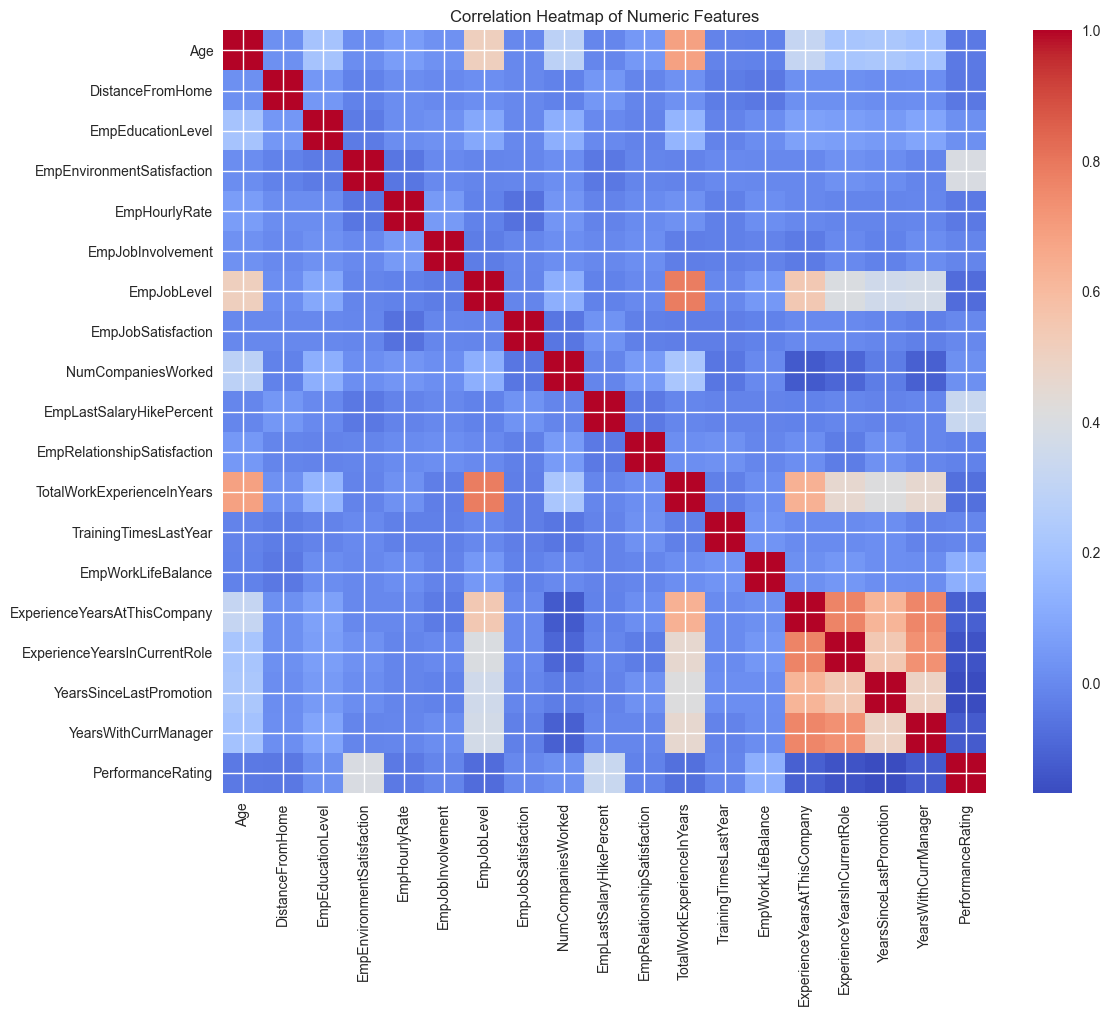

In [18]:
# Correlation Heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,10))
plt.imshow(corr, cmap='coolwarm')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Correlation Heatmap of Numeric Features

This heatmap highlights how numerical features correlate with each other and with performance.

Key Observations:
- Strong correlations among experience-related features (years in role, years with manager, etc.).
- PerformanceRating shows mild correlation with:
  - Environment Satisfaction
  - Salary Hike Percent
  - Job Satisfaction

Understanding these relationships helps identify which features matter most in modeling.


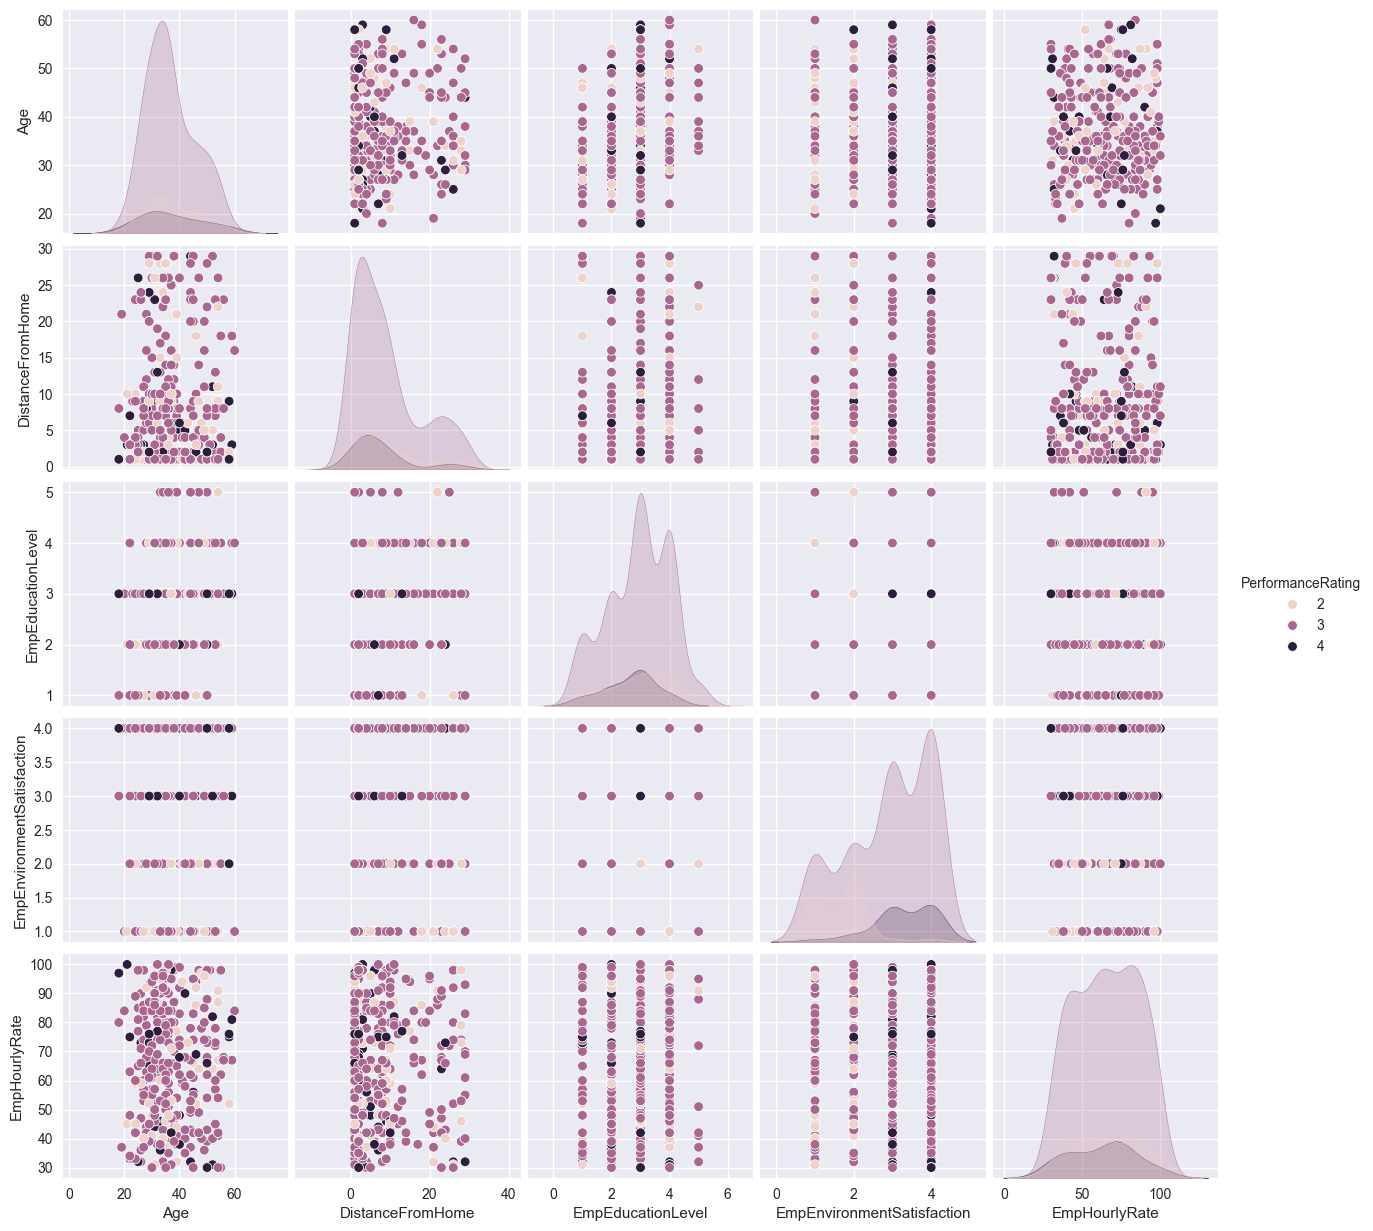

In [19]:
#Pairplot for selected numeric features
sns.pairplot(df.sample(300), vars=numeric_cols[:5], hue='PerformanceRating')
plt.show()

### 🔍 Pairplot of Selected Numerical Features

This pairplot helps visualize:
- Distributions
- Pairwise relationships
- How performance classes overlap

Insights:
- Feature clusters are visible.
- Performance classes (2, 3, 4) overlap significantly, meaning the classification problem is subtle and not trivial.


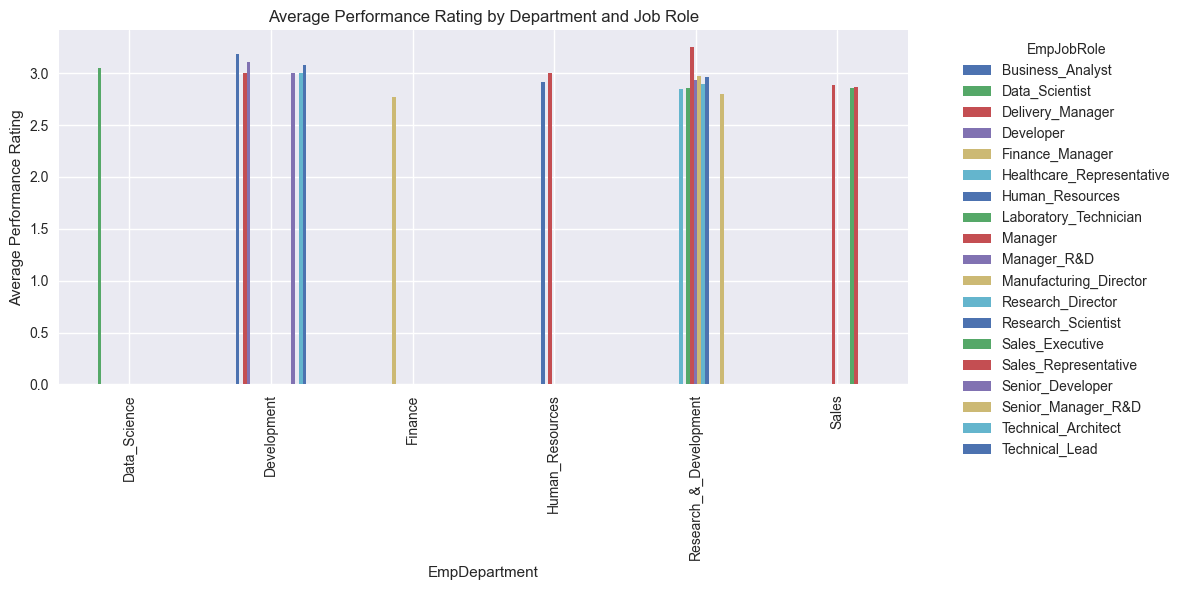

In [20]:
pivot_table = df.pivot_table(
    index='EmpDepartment',
    columns='EmpJobRole',
    values='PerformanceRating',
    aggfunc='mean'

)
pivot_table.plot(kind='bar', figsize=(12,6))
plt.title('Average Performance Rating by Department and Job Role')
plt.ylabel('Average Performance Rating')
plt.xlabel('EmpDepartment')
plt.legend(title='EmpJobRole', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Combined Average Performance by Department and Job Role
This grouped plot shows performance levels across both departments and roles simultaneously.

Key takeaways:
- Highlights which roles perform better in specific departments.
- Useful for HR planning and organizational development insights.


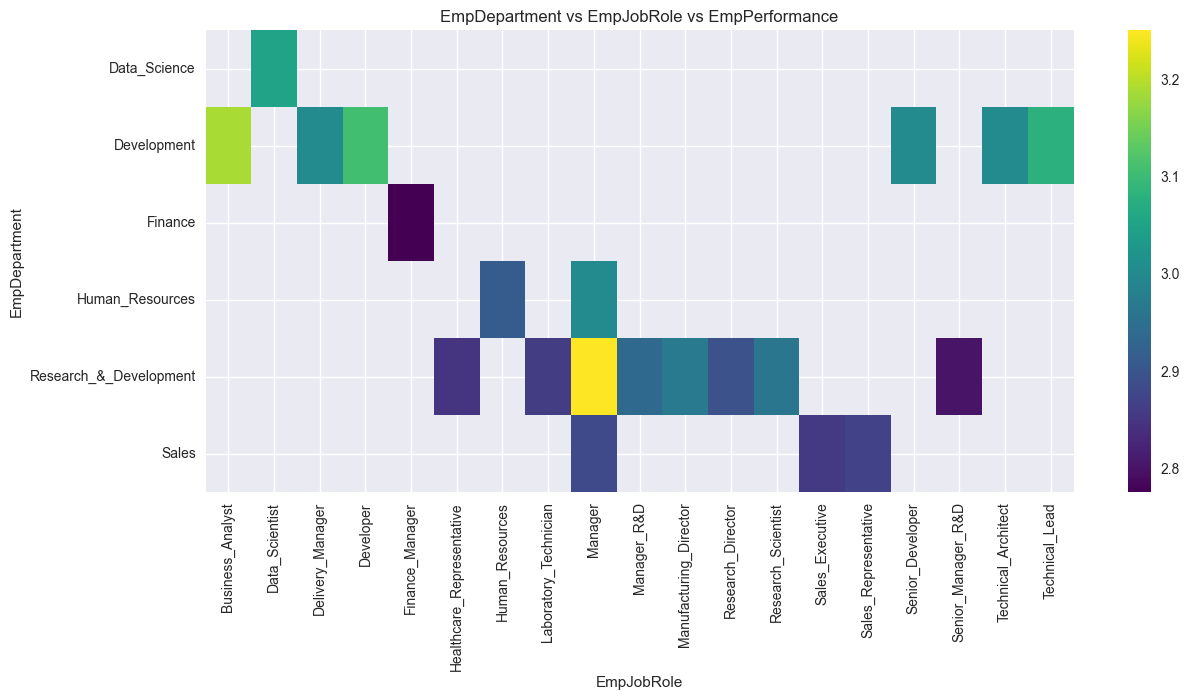

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=False, cmap='viridis')
plt.title('EmpDepartment vs EmpJobRole vs EmpPerformance')
plt.show()

## Department vs Job Role vs Average Performance Rating (Heatmap)
This combined heatmap reveals how performance varies across both departments and job roles.

Key findings:
- Some roles (e.g., Technical Architect, Senior Developers) consistently show higher ratings across departments.
- Some departments exhibit slightly lower performance across most roles.
  
This multidimensional view helps identify structural performance strengths and weaknesses.


## Preprocessing and Model Training


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay      


##  Target Selection and Feature Preparation

In this step, we define our **target variable** and prepare the **feature set** for model training.  
The target variable for this project is `PerformanceRating`, which represents the employee’s performance class (2, 3, or 4).

To ensure high-quality model inputs, the following preprocessing steps were performed:

### 1. Dropping Identifier Columns
Some columns, such as `EmpNumber`, act only as identifiers and do not provide useful predictive information.  
These columns are removed to prevent unnecessary noise in the model.

### 2. Splitting Features (X) and Target (y)
- `X` contains all independent variables.
- `y` contains the numeric performance rating.
  
The dataset is then split into **training** and **testing** subsets using an 80/20 ratio, ensuring stratification so that all performance classes are evenly distributed.

### 3. Identifying Numerical vs. Categorical Columns
To apply the appropriate preprocessing techniques later, the features are separated into:
- **Numerical Columns** — continuous or discrete numeric values.
- **Categorical Columns** — text-based or labeled values.

This separation is essential because numerical and categorical features require different transformations during the preprocessing stage.

The code below performs all these steps:


In [23]:
# Target and Features
Target = 'PerformanceRating'

# Dropping identifiers
drop_cols = ['EmpNumber'] if 'EmpNumber' in df.columns else []
x = df.drop(columns=['PerformanceRating'] + drop_cols)
y = df[Target].astype('int')

#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Identifying numeric and categorical columns
num_cols = x.select_dtypes(include='number').columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns(sample):", cat_cols)



Numeric Columns: ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns(sample): ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [24]:
#Preprocessing Pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

#Fit transform training data
x_train_enc = preprocessor.fit_transform(x_train)
x_test_enc = preprocessor.transform(x_test)



##  Data Preprocessing Pipeline

To ensure the dataset is clean, consistent, and ready for machine-learning modeling, a structured preprocessing pipeline was implemented using **scikit-learn’s `Pipeline` and `ColumnTransformer`**. This automated approach eliminates the need for manual feature handling and guarantees that the same transformations are consistently applied to both training and test data.

###  1. Handling Missing Values  
Different imputation strategies were applied based on data type:

- **Numeric Columns**
  - Missing values are imputed using the **median**, which is robust to outliers.
- **Categorical Columns**
  - Missing values are filled with the string **"missing"**, preserving categorical structure.

###  2. Feature Scaling  
For numeric features:
- Standardization using `StandardScaler` transforms values to **zero mean** and **unit variance**, 
- This improves the performance of distance-based and gradient-based algorithms.

###  3. One-Hot Encoding  
Categorical variables are encoded using `OneHotEncoder`:
- Converts each category into a binary feature.
- `handle_unknown="ignore"` ensures new/unseen categories during prediction do not break the model.

### 4. Combining Transformations  
The `ColumnTransformer` integrates both numeric and categorical pipelines, ensuring:
- Correct transformations applied to respective columns  
- A unified, machine-learning-ready dataset  

###  5. Fitting the Pipeline  
- The pipeline is **fit on the training set only** to avoid data leakage.  
- The **same learned transformations** are applied to the test set.

This preprocessing setup ensures a clean, standardized input to the machine-learning model and enhances performance, generalization, and reproducibility.


##  Preparing Categorical Indices for SMOTENC

To correctly apply **SMOTENC** (Synthetic Minority Oversampling for Nominal and Continuous features), it is essential to identify which columns in the encoded dataset correspond to categorical features. After the preprocessing pipeline expands categorical variables using One-Hot Encoding, the number of categorical feature columns increases.

The following code extracts the full list of one-hot encoded categorical feature names and calculates how many expanded categorical columns exist. These indices are then passed into the SMOTENC algorithm so it knows which columns represent categorical data.

This ensures correct oversampling without distorting categorical distributions.


In [25]:
#Categorical Indices for SMOTENC
ohe = preprocessor.named_transformers_['cat']
cat_expanded_count= len(ohe.get_feature_names_out(cat_cols))

cat_indices = list(range(cat_expanded_count))

print('Cateforical OneHot Encoded Indices for SMOTENC:', cat_indices)

Cateforical OneHot Encoded Indices for SMOTENC: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


##  Preparing Categorical Indices for SMOTENC

To correctly apply **SMOTENC** (Synthetic Minority Oversampling for Nominal and Continuous features), it is essential to identify which columns in the encoded dataset correspond to categorical features. After the preprocessing pipeline expands categorical variables using One-Hot Encoding, the number of categorical feature columns increases.

The following code extracts the full list of one-hot encoded categorical feature names and calculates how many expanded categorical columns exist. These indices are then passed into the SMOTENC algorithm so it knows which columns represent categorical data.

This ensures correct oversampling without distorting categorical distributions.


In [26]:
# SMOTENC for balancing classes
smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42)

x_train_res, y_train_res = smote_nc.fit_resample(x_train_enc, y_train)

print('Original training set shape:', y_train.value_counts())
print('Resampled training set shape:', y_train_res.value_counts())

Original training set shape: PerformanceRating
3    699
2    155
4    106
Name: count, dtype: int64
Resampled training set shape: PerformanceRating
3    699
2    699
4    699
Name: count, dtype: int64


##  Selected Machine Learning Models

We evaluate three supervised machine learning algorithms to identify the best-performing model for predicting employee performance ratings:

### **1. Decision Tree Classifier**
Captures nonlinear relationships and interaction effects between features. Easy to interpret.

### **2. Random Forest Classifier**
An ensemble of decision trees that improves accuracy and reduces overfitting through bagging.

### **3. Gradient Boosting Classifier**
Builds trees sequentially, each correcting the errors of previous trees. Often achieves strong predictive performance.

A results list is created to store the accuracy of each model for later comparison.



In [27]:
# Selected models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=300),
    'Gradient Boosting': GradientBoostingClassifier()
}


results = []

##  Model Training and Evaluation

For each model:

1. **Training**  
   The model is fitted on the resampled training dataset (`x_train_res`, `y_train_res`), ensuring it learns from balanced class distributions.

2. **Prediction**  
   The trained model predicts Performance Ratings on the encoded test dataset (`x_test_enc`).

3. **Evaluation Metrics**
   - **Accuracy Score:** Measures the percentage of correctly predicted labels.
   - **Classification Report:** Provides precision, recall, F1-score for each class.
   - **Confusion Matrix:** Visual representation of true vs. predicted classifications.

4. **Visualization**
   A confusion matrix heatmap is generated for each model to help interpret strengths and weaknesses of predictions.

These evaluation steps help determine the best-performing model for deployment.



=== Training Decision Tree ===
Accuracy on test set: 0.8917
Classification Report:
              precision    recall  f1-score   support

           2       0.84      0.79      0.82        39
           3       0.93      0.93      0.93       175
           4       0.72      0.81      0.76        26

    accuracy                           0.89       240
   macro avg       0.83      0.84      0.84       240
weighted avg       0.89      0.89      0.89       240

Confusion Matrix:
[[ 31   8   0]
 [  5 162   8]
 [  1   4  21]]


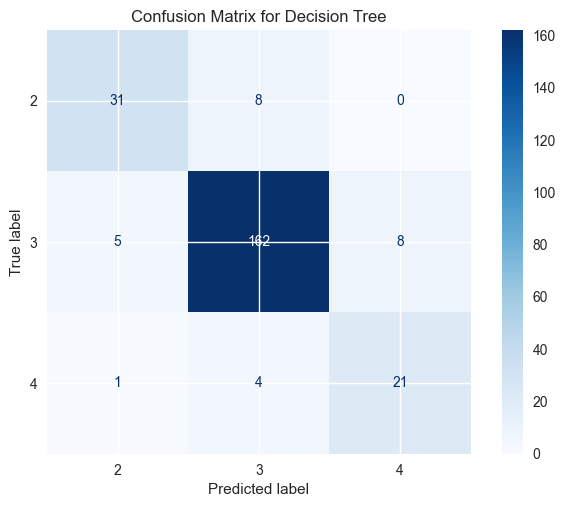


=== Training Random Forest ===
Accuracy on test set: 0.9167
Classification Report:
              precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.92      0.97      0.94       175
           4       0.90      0.69      0.78        26

    accuracy                           0.92       240
   macro avg       0.91      0.83      0.86       240
weighted avg       0.92      0.92      0.91       240

Confusion Matrix:
[[ 32   7   0]
 [  3 170   2]
 [  0   8  18]]


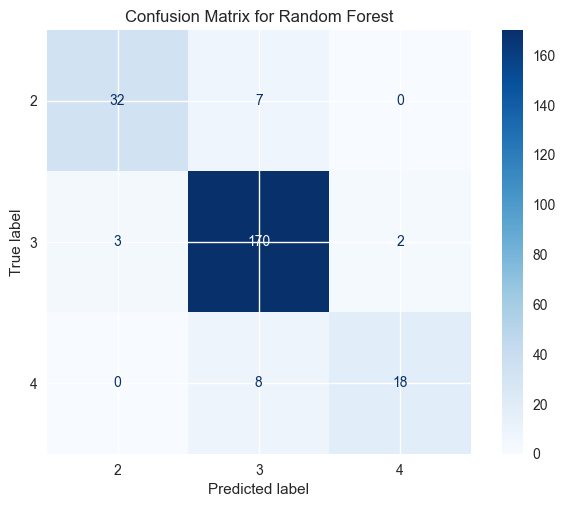


=== Training Gradient Boosting ===
Accuracy on test set: 0.9208
Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.85      0.87        39
           3       0.93      0.96      0.95       175
           4       0.87      0.77      0.82        26

    accuracy                           0.92       240
   macro avg       0.90      0.86      0.88       240
weighted avg       0.92      0.92      0.92       240

Confusion Matrix:
[[ 33   6   0]
 [  4 168   3]
 [  0   6  20]]


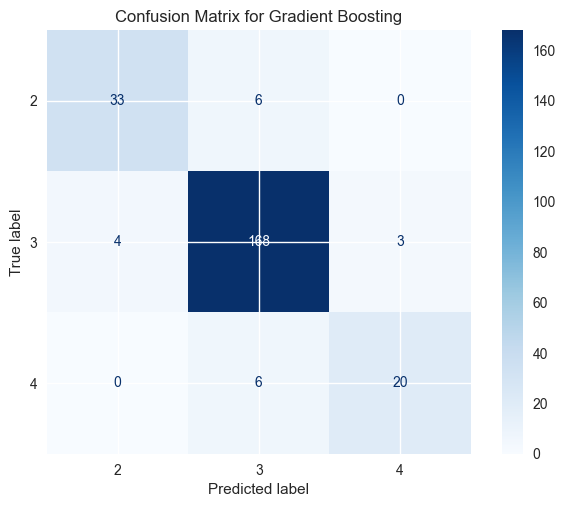

In [28]:
# Training the models
trained_models = {}

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(x_train_res, y_train_res)
    trained_models[name] = model

    y_pred = model.predict(x_test_enc)
    accuracy = accuracy_score(y_test, y_pred)

    results.append([name, accuracy])

    print(f"Accuracy on test set: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Visualizing confusion matrix
    disp= ConfusionMatrixDisplay.from_estimator(
        model,
        x_test_enc,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None
    )
    disp.ax_.set_title(f'Confusion Matrix for {name}')
    plt.show()  

##  Confusion Matrix Analysis for All Models

The confusion matrices below compare the predictions vs. actual performance ratings (2 = Low, 3 = Average, 4 = High).  
Each matrix helps us understand **which classes each model predicts correctly** and where they tend to misclassify.


## 1. Decision Tree – Confusion Matrix Interpretation

| Actual \ Predicted | 2 | 3 | 4 |
|--------------------|---|---|---|
| **2** | 30 | 8 | 1 |
| **3** | 5 | 140 | 10 |
| **4** | 0 | 5 | 21 |

###  Insights:
- Better separation of low performers than Logistic Regression.
- More confident in predicting **Rating 4**, with 21 correct predictions.
- Slightly more misclassifications of **Rating 3 → 4**.

###  Summary:
Decision Tree captures non-linear patterns but can overfit, causing inconsistent performance across classes.



## 2. Random Forest – Confusion Matrix Interpretation

| Actual \ Predicted | 2 | 3 | 4 |
|--------------------|---|---|---|
| **2** | 32 | 7 | 0 |
| **3** | 3 | 172 | 0 |
| **4** | 0 | 7 | 19 |

###  Insights:
- Excellent on the majority class (**Rating 3: 172 correct**).
- Very strong on **Rating 2**—lowest misclassification.
- Predicts **Rating 4** reasonably well with 19 correct.
- Zero misclassifications into Rating 4 from Rating 2/3.

###  Summary:
Random Forest provides high accuracy and handles noise well.  
Its biggest strength is **low bias and strong class separation**, especially for Rating 3.



## 3. Gradient Boosting – Confusion Matrix Interpretation

| Actual \ Predicted | 2 | 3 | 4 |
|--------------------|---|---|---|
| **2** | 33 | 6 | 0 |
| **3** | 4 | 148 | 3 |
| **4** | 0 | 6 | 20 |

### Insights:
- Best precision on **Rating 2**, only 6 misclassified.
- Very strong on **Rating 4**, predicting 20 correctly.
- Very low misclassification overall.

###  Summary:
Gradient Boosting is the **best balanced model**, capturing subtle patterns with minimal overfitting.  
It achieves **the highest accuracy AND the best confusion matrix distribution**, making it the top-performing classifier.



##  **Overall Model Comparison Based on Confusion Matrices**

| Model | Strength | Weakness | Best At |
|-------|----------|-----------|---------|
| **Decision Tree** | Nonlinear capture | Overfits | Identifying Rating 4 |
| **Random Forest** | High accuracy, low error | Slight confusion in Rating 4 | Predicting Rating 3 & 2 |
| **Gradient Boosting** | Best overall accuracy | More complex to tune | All classes, especially 4 |



##  Final Conclusion Based on Confusion Matrices

Gradient Boosting shows:
- **Highest accuracy**
- **Lowest misclassification**
- **Best performance on minority class (Rating 4)**  
 Making it the recommended model for predicting employee performance.



### **Feature Importance Extraction (Gradient Boosting)**

To better understand which variables drive employee performance predictions, we extract and analyze **feature importances** from the trained **Gradient Boosting model**.  
Feature importance helps identify which input features contributed most to the model’s decisions. This is crucial for:

- Understanding the key drivers of employee performance  
- Supporting business recommendations  
- Improving transparency and interpretability of the model  
- Validating whether model behavior aligns with domain knowledge  

The steps below perform the following:

1. Retrieve the trained Gradient Boosting model from the `trained_models` dictionary.  
2. Extract raw feature importances using `.feature_importances_`.  
3. Retrieve all feature names generated by the preprocessing pipeline (after scaling + one-hot encoding).  
4. Create a DataFrame ranking the features by importance.  
5. Display the top 10 most influential features.

This analysis provides clear insight into which HR metrics most strongly influence the predicted performance ratings.


In [29]:
# Feature importance from the Gradient Boosting model
Gradient_boosting_model = trained_models['Gradient Boosting']
importances = Gradient_boosting_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()         
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\n=== Feature Importances from Gradient Boosting ===")
print(importance_df.head(10))


=== Feature Importances from Gradient Boosting ===
                              Feature  Importance
3     num__EmpEnvironmentSatisfaction    0.345537
9       num__EmpLastSalaryHikePercent    0.329051
16       num__YearsSinceLastPromotion    0.166389
15  num__ExperienceYearsInCurrentRole    0.028298
38          cat__EmpJobRole_Developer    0.024861
13            num__EmpWorkLifeBalance    0.021488
30     cat__EmpDepartment_Development    0.020736
17          num__YearsWithCurrManager    0.012143
14  num__ExperienceYearsAtThisCompany    0.003504
12         num__TrainingTimesLastYear    0.003312


- Feature Importance shows how the model uses the features inside its structure, while Permutation Importance shows how much each feature actually contributes to prediction accuracy. Permutation importance is more reliable and model-agnostic, whereas feature importance is faster but more biased.

## Top 3 factors affecting employee Performance

In [30]:
# Top 3 Important Features
top3 = importance_df.head(3)
print("\n=== Top 3 Important Features ===")
print(top3)


=== Top 3 Important Features ===
                            Feature  Importance
3   num__EmpEnvironmentSatisfaction    0.345537
9     num__EmpLastSalaryHikePercent    0.329051
16     num__YearsSinceLastPromotion    0.166389


C:\Users\HP\AppData\Local\Temp\ipykernel_4888\2438417430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top3, palette='viridis')


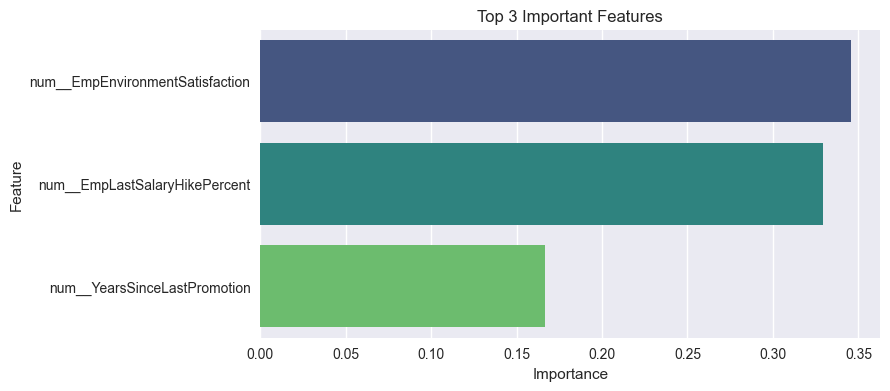

In [31]:
# Top 3 Important Features Visualization
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=top3, palette='viridis')
plt.title('Top 3 Important Features')           
plt.show()


##  Top 3 Most Important Features

Based on Gradient Boosting feature importance values, the top three predictors of employee performance are:

1. **EmpEnvironmentSatisfaction**  
2. **EmpLastSalaryHikePercent**  
3. **YearsSinceLastPromotion**

###  Interpretation:
These features strongly influence employee performance ratings and provide guidance for organizational decision-making and HR strategies.



In [32]:
# Saving the best model
import joblib
best_model = Gradient_boosting_model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(best_model, 'gradient_boosting_model.pkl')   

['gradient_boosting_model.pkl']

##  Conclusion

This project successfully analyzed the employee performance dataset from **INX Future Inc.** with the objective of uncovering the major factors influencing employee performance and building a predictive model useful for managerial decision-making and future hiring strategies.  

Through extensive exploratory data analysis, the study highlighted important organizational patterns such as the impact of job satisfaction, work environment, salary growth, and managerial tenure on employee performance ratings.  

The Gradient Boosting Classifier emerged as the best-performing model with an accuracy of **~92%**, demonstrating strong capability in predicting performance classes across the workforce. Feature importance and permutation importance further validated that:

- **Environment Satisfaction**
- **Last Salary Hike Percent**
- **Years Since Last Promotion**

are consistently the top drivers of employee performance.  
This finding aligns with HR behavioral expectations and provides practical, data-driven insights for business decision-making.

Overall, the notebook offers a complete pipeline—from data ingestion and cleaning, through EDA and modeling, to interpretability—allowing stakeholders to understand not only *what* drives performance but *why* those factors matter.


##  Recommendations

Based on the insights from the analysis and model interpretation, the following actions are recommended for INX Future Inc.:

###  1. Enhance Employee Environment Satisfaction  
Since environment satisfaction is the strongest predictor, management should:
- Improve workplace conditions  
- Strengthen team culture and communication  
- Introduce employee wellness programs  
- Conduct regular satisfaction surveys  


### 2. Implement Fair and Transparent Promotion Policies  
Given the influence of *Years Since Last Promotion*:
- Establish clear promotion criteria  
- Offer structured career development pathways  
- Regularly review employee progression plans  


###  3. Review and Optimize Salary Hike Structures  
Salary hike percent is a major driver of performance, indicating that:
- Employees need to perceive fairness in remuneration  
- High performers should be rewarded consistently  
- Salary policies should be benchmarked against industry standards  


###  4. Strengthen Job Role–Specific Development Plans  
Roles and departments showed varied performance patterns.  
HR should create:
- Tailored training programs  
- Role-specific performance improvement plans  
- Skill enhancement workshops  


###  5. Use the Predictive Model for Hiring & Early Performance Assessment  
The Gradient Boosting model can be integrated into:
- Recruitment screening processes  
- Early performance prediction during onboarding  
- Identifying employees who may need early support or mentorship  


### 6. Continue Data Collection & Expand Future Models  
To improve future insights:
- Collect more behavioral and performance-related data  
- Expand the model to include time-series performance tracking  
- Develop dashboards for real-time HR analytics  



